In [26]:
import random
import math as m
import numpy as np
from numpy.linalg import norm
import scipy
import sympy
import scipy.integrate as spint
from sympy import diff, symbols
import matplotlib.pyplot as plt
from scipy import special
import statistics

def A(b,l,a):
    return b*(1+2*l*(1+a))

def B(t,a):
    return 1-2*t*(1+a)

def E(l , t , a ,b):
    integral = -1/(np.pi) * np.abs(A(b,l,a)+B(t,a)) * special.ellipe((4*A(b,l,a)*B(t,a))/(A(b,l,a)+B(t,a))**2)
    term = (1+a)*(b*l**2 - t**2)
    return integral + term

def delE_l(l , t , a ,b, steps=0.00001 ):
    return (E(l+steps , t , a ,b)-E(l , t , a ,b))/steps

def delE_t(l , t , a ,b, steps=0.00001 ):
    return (E(l , t+steps , a ,b)-E(l , t , a ,b))/steps

def gradE(l, t, a, b):
        return np.array([delE_l(l, t, a, b), delE_t(l, t, a, b)])
    
def descent(l,t,a,b,learn_rate = 0.01,mxloop=10000, tolerance=5):
    n = 0
    while n < mxloop:
#         print([l,t], E(l, t, a,b), gradE(l, t, a,b))
        if round(gradE(l, t, a,b)[0],tolerance) != 0 and round(gradE(l, t, a,b)[1], tolerance) != 0:
            l -= learn_rate * gradE(l, t, a,b)[0]
            t += learn_rate * gradE(l, t, a,b)[1]
            n+=1   
        else:
            return [l,t]
    return [l,t]
#     return 0


def E_root(a,b): 
    l = random.gauss(0,1)
    t = random.gauss(0,1)
    l_list = []
    t_list = []
    for i in range(10): ## kind of need to trust it can find the values, coz only 80-100 percent accurate
        l_list.append(descent(l,t,a,b)[0])
        t_list.append(descent(l,t,a,b)[1])
    return [statistics.mean(l_list),statistics.mean(t_list)] 


def dispersion(l,t,a,b,k):
    return (np.sqrt((1 - 2*(1 + a) *t)**2 + (b * (1 + 2 *(1 + a) * l))**2 + 2 *(1 - 2 *(1 + a)* t)* (b *(1 + 2 *(1 + a)*l)) * np.cos(k)))
    
def gap(l,t,a,b,k=np.pi):
    return 2*dispersion(l,t,a,b,k)

#plot 3D dispersion??
def PlotEnergy(a,b, xy_rot = 15, azi_rot = 5):
    l0 = E_root(a,b)[0]
    t0 = E_root(a,b)[1]
    l_list = np.linspace(-0.8,0.8,100)
    t_list = np.linspace(-0.8,0.8,100)
#     l0_list = np.linspace(E_root(alist,blist)[0])
#     t0_list = np.linspace(E_root(alist,blist)[1])
    l_plot, t_plot = np.meshgrid(l_list, t_list)
    E_dens = E(l_plot, t_plot, a,b)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(t_plot, l_plot,  E_dens,400, cmap='binary')
    ax.set_xlabel('lambda')
    ax.set_ylabel('t')
    ax.set_zlabel('Energy Density')
    ax.view_init(xy_rot, azi_rot)

def PhaseDiagramData():
    amin = -0.99; 
    amax = -0.01; 
    bmin = 0.01; 
    bmax = 1.0; 
    alist = np.linspace(amin,amax,20)
    blist = np.linspace(bmin,bmax,20)
    a_plot = []
    b_plot = []
#     delta_plot = []
    for a in alist:
        for b in blist:
            l0, t0 = E_root(a,b)
            delta = gap(l0,t0,a,b)
            print(delta)
            if round(delta,2) == 0 or round(delta,1) == 0:
                a_plot.append(a)
                b_plot.append(b)
#                 delta_plot.append(delta) #can save delta points to csv file for easier access
    return a_plot, b_plot
## better to do both separate to make adjusting the plot easier

def PlotBisection(data, mode = "scatter"):
    a_data, b_data = data
    if mode =="scatter":
        plt.scatter(b_data, a_data)
    elif mode =="plot":
        plt.plot(b_data, a_data,"-ok")
    plt.xlim(0, 1);
    plt.ylim(-1, 0);
    plt.show()
    


20 points of alpha and beta, round = 2

In [10]:
import time
start = time.time()
print(PhaseDiagramData())
print("")
print("Runtime: --- %s seconds ---" % (time.time() - start))

1.965339528319993
1.8674205039769558
1.7481235437904874
1.6407457947298343
1.528713034724309
1.4496413507025825
1.3374446129322672
1.2318545344614817
1.1245608981775403
1.0343005173046538
0.9299389550897134
0.8083870834443652
0.7066075134904
0.5932480129742241
0.502390986006431
0.40186674515260795
0.29910509821919085
0.19250900878496302
0.09868983775903259
0.014460197532461978
1.8586748601116787
1.7559406462643175
1.6477470040700757
1.5456923315756534
1.4355737447553654
1.3335568526007608
1.2289135128331865
1.1241637022530004
1.0199888206970569
0.912406488014254
0.8067044944822768
0.6999509223041841
0.5934496939567061
0.48673362835580597
0.3804716204025067
0.2870308811773454
0.16655750604061362
0.05919982692749278
0.07349933814958722
0.15641768895228036
1.7538339051121188
1.6540890863483042
1.5556064469564432
1.435470333731171
1.3321299775865498
1.2298943490231564
1.122137800776325
1.020253807569273
0.9235580370933559
0.8143940873461415
0.6959641353103684
0.5883402407406507
0.494886277

Plotting the above case:

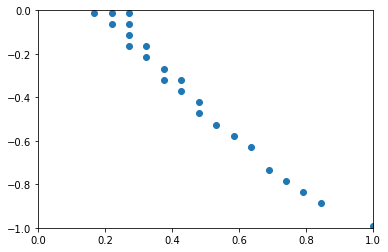

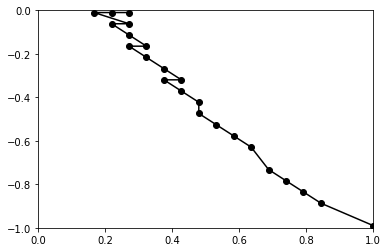

In [33]:
data_minphase = ([-0.99, -0.8868421052631579, -0.8352631578947368, -0.7836842105263158, -0.7321052631578948, -0.6289473684210527, -0.5773684210526315, -0.5257894736842106, -0.4742105263157895, -0.42263157894736847, -0.3710526315789474, -0.31947368421052635, -0.31947368421052635, -0.2678947368421053, -0.21631578947368424, -0.16473684210526318, -0.16473684210526318, -0.11315789473684212, -0.061578947368421066, -0.061578947368421066, -0.01, -0.01, -0.01], [1.0, 0.8436842105263158, 0.791578947368421, 0.7394736842105263, 0.6873684210526316, 0.6352631578947369, 0.5831578947368421, 0.5310526315789474, 0.4789473684210527, 0.4789473684210527, 0.4268421052631579, 0.37473684210526315, 0.4268421052631579, 0.37473684210526315, 0.32263157894736844, 0.2705263157894737, 0.32263157894736844, 0.2705263157894737, 0.21842105263157896, 0.2705263157894737, 0.16631578947368422, 0.21842105263157896, 0.2705263157894737])
PlotBisection(data_minphase, mode = "scatter")
PlotBisection(data_minphase, mode = "plot")

Trying the mid point when there is a gradient change

In [32]:
import csv
with open("datapoints.csv") as f:
    deltalist = [float(pt) for pt in f]
print(len(deltalist)) #400 data points
amin = -0.99; 
amax = -0.01; 
bmin = 0.01; 
bmax = 1.0; 
alist = np.linspace(amin,amax,20)
blist = np.linspace(bmin,bmax,20)

400


In [ ]:
def PhaseDiagramData_Midpt():
    amin = -0.99; 
    amax = -0.01; 
    bmin = 0.01; 
    bmax = 1.0; 
    alist = np.linspace(amin,amax,20)
    blist = np.linspace(bmin,bmax,20)
    a_plot = []
    b_plot = []
#     delta_plot = []
    for a in alist:
        for b in blist:
            l0, t0 = E_root(a,b)
            delta = gap(l0,t0,a,b)
            print(delta)
            if round(delta,2) == 0:
                a_plot.append(a)
                b_plot.append(b)
#                 delta_plot.append(delta)
    return a_plot, b_plot